<h1> Backtesting ML Classification </h1>

# Load the model

In [3]:
import pickle

In [4]:
with open('models/model_dt_classifications.pkl', 'rb') as f:
    model_dt = pickle.load(f)

In [5]:
model_dt

DecisionTreeClassifier(max_depth=85)

# Load the data 

In [6]:
import pandas as pd 


In [8]:
df= pd.read_excel('Data/Data_Nifty_50_Processed.xlsx', index_col=0, parse_dates=['Date'])


df 

,Open,High,Low,Close,Adj Close,Volume,Change_Tomorrow,Change_Tomorrow_direction
Date,,,,,,,,
2016-12-01,8244.000000,8250.799805,8185.049805,8192.900391,8192.900391,157700,-1.312022,DOWN
2016-12-02,8153.549805,8159.299805,8070.049805,8086.799805,8086.799805,171500,0.516072,UP
2016-12-05,8088.750000,8141.899902,8056.850098,8128.750000,8128.750000,126500,0.176835,UP
2016-12-06,8153.149902,8178.700195,8130.850098,8143.149902,8143.149902,115300,-0.507280,DOWN
2016-12-07,8168.399902,8190.450195,8077.500000,8102.049805,8102.049805,169800,1.755820,UP
...,...,...,...,...,...,...,...,...
2024-10-09,25065.800781,25234.050781,24947.699219,24981.949219,24981.949219,290600,0.066004,UP
2024-10-10,25067.050781,25134.050781,24979.400391,24998.449219,24998.449219,261400,-0.136993,DOWN
2024-10-11,24985.300781,25028.650391,24920.050781,24964.250000,24964.250000,210500,0.651463,UP


# Backtesting.py Library 

Create your Strategy Class

In [9]:
# !pip install backtesting

Defaulting to user installation because normal site-packages is not writeable
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/6.9 MB ? eta -:--:--
   ---- ----------------------------------- 0.8/6.9 MB 4.2 MB/s eta 0:00:02
   ------------- -------------------------- 2.4/6.9 MB 6.1 MB/s eta 0:00:01
   ---------------------- ----------------- 3.9/6.9 MB 6.7 MB/s eta 0:00:01
   --------------------------------- ------ 5.8/6.9 MB 7.2 MB/s eta 0:00:01
   ---------------------------------------  6.8/6.9 MB 7.2 MB/s eta 0:00:01
   ----------------------------------

In [10]:
from backtesting import Backtest, Strategy

In [11]:
df

,Open,High,Low,Close,Adj Close,Volume,Change_Tomorrow,Change_Tomorrow_direction
Date,,,,,,,,
2016-12-01,8244.000000,8250.799805,8185.049805,8192.900391,8192.900391,157700,-1.312022,DOWN
2016-12-02,8153.549805,8159.299805,8070.049805,8086.799805,8086.799805,171500,0.516072,UP
2016-12-05,8088.750000,8141.899902,8056.850098,8128.750000,8128.750000,126500,0.176835,UP
2016-12-06,8153.149902,8178.700195,8130.850098,8143.149902,8143.149902,115300,-0.507280,DOWN
2016-12-07,8168.399902,8190.450195,8077.500000,8102.049805,8102.049805,169800,1.755820,UP
...,...,...,...,...,...,...,...,...
2024-10-09,25065.800781,25234.050781,24947.699219,24981.949219,24981.949219,290600,0.066004,UP
2024-10-10,25067.050781,25134.050781,24979.400391,24998.449219,24998.449219,261400,-0.136993,DOWN
2024-10-11,24985.300781,25028.650391,24920.050781,24964.250000,24964.250000,210500,0.651463,UP


In [13]:
df_explanatory=df.drop(columns=['Change_Tomorrow',	'Change_Tomorrow_direction'])

In [39]:
model_dt.predict(X=df_explanatory)

array(['DOWN', 'UP', 'UP', ..., 'UP', 'DOWN', 'DOWN'], dtype=object)

In [40]:
explanatory_today=df_explanatory.iloc[[-1], :]

In [41]:
forecast_tomorrow = model_dt.predict(explanatory_today)[0]

In [42]:
list_buy_sell =[]

# Calculate Purchase Recommendation 


Buy if it goes up 

In [22]:
df[['Change_Tomorrow_direction']].head(10)

,Change_Tomorrow_direction
Date,
2016-12-01,DOWN
2016-12-02,UP
2016-12-05,UP
2016-12-06,DOWN
2016-12-07,UP
2016-12-08,UP
2016-12-09,DOWN
2016-12-12,UP
2016-12-13,DOWN


In [26]:
for tomorrow_direction in df.Change_Tomorrow_direction:
    if tomorrow_direction =='UP':
        list_buy_sell.append(1)
    elif tomorrow_direction =='DOWN':
        list_buy_sell.append(-1)


In [27]:
list_buy_sell

[-1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,


In [28]:
df['buy_sell']=list_buy_sell

In [29]:
df[['Change_Tomorrow_direction', 'buy_sell']].head(10)

,Change_Tomorrow_direction,buy_sell
Date,,
2016-12-01,DOWN,-1
2016-12-02,UP,1
2016-12-05,UP,1
2016-12-06,DOWN,-1
2016-12-07,UP,1
2016-12-08,UP,1
2016-12-09,DOWN,-1
2016-12-12,UP,1
2016-12-13,DOWN,-1


# Buy if it goes UP and sell if DOWN

In [30]:
list_buy_sell =[]

already_bought = False 

In [31]:
for tomorrow_direction in df.Change_Tomorrow_direction:
    if tomorrow_direction =='UP' and already_bought == False:
        list_buy_sell.append(1)
        already_bought=True
    elif tomorrow_direction == 'DOWN' and already_bought==True:
        list_buy_sell.append(-1)
        already_bought = False 
    
    else: 
        list_buy_sell.append(0)

In [32]:
df['buy_sell_track'] = list_buy_sell

In [33]:
df[['Change_Tomorrow_direction', 'buy_sell', 'buy_sell_track']].head(10)

,Change_Tomorrow_direction,buy_sell,buy_sell_track
Date,,,
2016-12-01,DOWN,-1,0
2016-12-02,UP,1,1
2016-12-05,UP,1,0
2016-12-06,DOWN,-1,-1
2016-12-07,UP,1,1
2016-12-08,UP,1,0
2016-12-09,DOWN,-1,-1
2016-12-12,UP,1,1
2016-12-13,DOWN,-1,-1


# Model implimentation 


In [50]:
class ClassificatonUP(Strategy):
    def init(self):
        self.model = model_dt
        self.already_bought = False 
        
    
    def next(self):
        explanatory_today=self.data.df.iloc[[-1], :]
        forecast_tomorrow = model_dt.predict(explanatory_today)[0]
        
        # add condition to the strategy 
        if forecast_tomorrow =='UP' and self.already_bought == False:
            list_buy_sell.append(1)
            self.buy()
            self.already_bought=True
        elif forecast_tomorrow == 'DOWN' and self.already_bought==True:
            list_buy_sell.append(-1)
            self.sell()
            self.already_bought = False 
    
        else: 
            pass

    

# Difine Initial Condition 

In [51]:
bt = Backtest(data= df_explanatory, strategy=ClassificatonUP,
              cash=10000, commission=0.002, exclusive_orders=True)


C:\Users\saura\AppData\Local\Temp\ipykernel_1996\1547365405.py:1: UserWarning: Some prices are larger than initial cash value. Note that fractional trading is not supported. If you want to trade Bitcoin, increase initial cash, or trade μBTC or satoshis instead (GH-134).
  bt = Backtest(data= df_explanatory, strategy=ClassificatonUP,



# Run Backtesting

In [53]:
results=bt.run()

# Interpreater Backtesting

In [54]:
results.to_frame(name='Values').loc[:'Return [%]']

,Values
Start,2016-12-01 00:00:00
End,2024-10-15 00:00:00
Duration,2875 days 00:00:00
Exposure Time [%],99.89696
Equity Final [$],17160088.410653
Equity Peak [$],17327645.945567
Return [%],171500.884107


<Axes: xlabel='Date'>

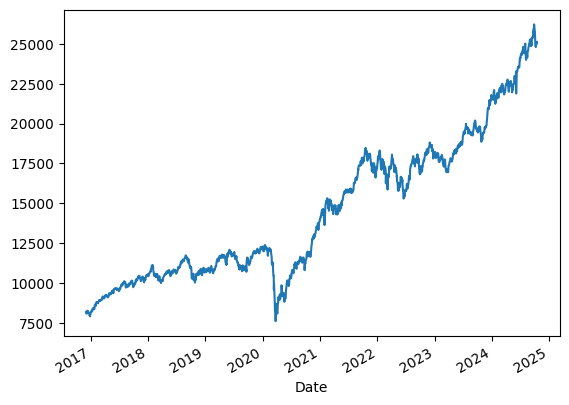

In [55]:
df.Close.plot()